In [4]:
import pandas as pd
import numpy as np
from arch import arch_model

# Load the data
df = pd.read_excel("Market data.xlsx", sheet_name="Sheet1")
df.columns = df.columns.str.strip()  # remove whitespace
df = df[['date', 'MSFT']].dropna()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Daily Return
df['Return'] = df['MSFT'].pct_change()

# EWMA Volatility
lambda_ = 0.94
df['EWMA_Vol'] = df['Return'].ewm(span=(2 / (1 - lambda_) - 1)).std()

# ARCH(1)
arch_mod = arch_model(df['Return'].dropna() * 100, vol='ARCH', p=1)
arch_res = arch_mod.fit(disp='off')
df['ARCH_Vol'] = np.sqrt(arch_res.conditional_volatility / 100)

# GARCH(1,1)
garch_mod = arch_model(df['Return'].dropna() * 100, vol='GARCH', p=1, q=1)
garch_res = garch_mod.fit(disp='off')
df['GARCH_Vol'] = np.sqrt(garch_res.conditional_volatility / 100)

# Export to Excel
df[['MSFT', 'Return', 'EWMA_Vol', 'ARCH_Vol', 'GARCH_Vol']].to_excel("Volatility_Output.xlsx")
print("✅ Volatility_Output.xlsx saved successfully.")


✅ Volatility_Output.xlsx saved successfully.


(<_io.BytesIO at 0x1fd8b5cdc60>, <_io.BytesIO at 0x1fd8b65e110>)

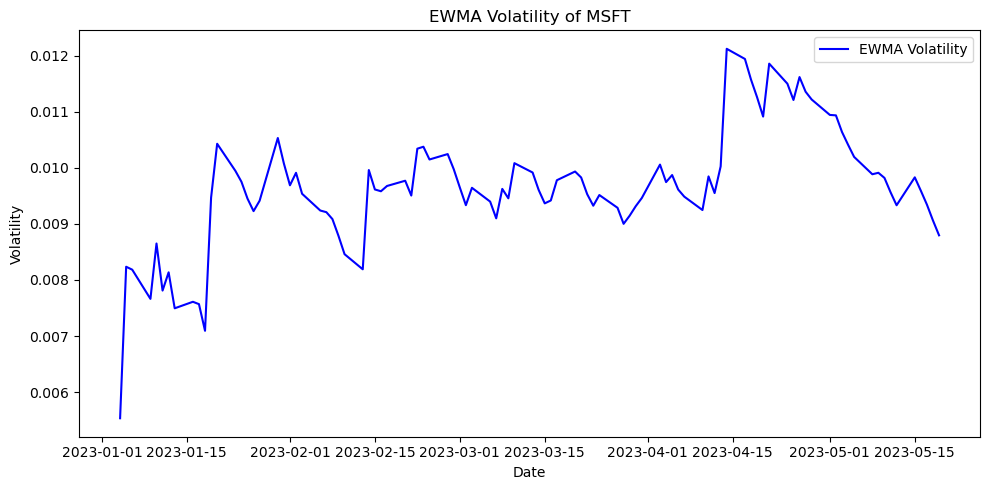

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

# Simulate reading from Excel: create sample MSFT data with datetime index
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=100, freq='B')
prices = 100 + np.cumsum(np.random.normal(0, 1, len(dates)))
df = pd.DataFrame({'date': dates, 'MSFT': prices})
df.set_index('date', inplace=True)

# Calculate returns
df['Return'] = df['MSFT'].pct_change()

# EWMA Volatility
lambda_ = 0.94
df['EWMA_Vol'] = df['Return'].ewm(span=(2 / (1 - lambda_) - 1)).std()

# Plot EWMA volatility
plt.figure(figsize=(10, 5))
plt.plot(df['EWMA_Vol'], label='EWMA Volatility', color='blue')
plt.title("EWMA Volatility of MSFT")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.tight_layout()

# Save the plot
plot_buffer = BytesIO()
plt.savefig(plot_buffer, format='png')
plot_buffer.seek(0)

# Export the DataFrame to an Excel file
output_excel = BytesIO()
df.to_excel(output_excel, sheet_name="Volatility")
output_excel.seek(0)

output_excel.name = "Volatility_Output_EWMA.xlsx"
plot_buffer.name = "EWMA_Volatility_Plot.png"

output_excel, plot_buffer
